In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: ignored

In [0]:
!pip install -q contextily

In [13]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (49.7 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1

In [1]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 2.7MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702141 sha256=545b6adf4c5e43759ef3ed712eaed26d68a6857c502d0fccce383637d2ca4cbe
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.6.0
    Uninstalling pyproj-2.6.0:
      Successfully uninstalled pyproj-2.6.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx
from mpl_toolkits.basemap import Basemap

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
from google.colab import files
uploaded = files.upload()

Saving fire_nrt_M6_96619.csv to fire_nrt_M6_96619.csv


In [0]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['fire_nrt_M6_96619.csv']))

In [12]:
df1.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,-14.281,143.636,323.9,1.7,1.3,2019-10-01,25,Terra,MODIS,70,6.0NRT,302.3,26.8,D
1,-14.284,143.532,343.5,1.7,1.3,2019-10-01,25,Terra,MODIS,90,6.0NRT,306.3,84.3,D
2,-14.302,143.706,320.2,1.7,1.3,2019-10-01,25,Terra,MODIS,30,6.0NRT,305.0,14.1,D
3,-14.283,143.652,320.4,1.7,1.3,2019-10-01,25,Terra,MODIS,57,6.0NRT,303.3,18.4,D
4,-14.285,143.521,349.4,1.7,1.3,2019-10-01,25,Terra,MODIS,94,6.0NRT,304.7,110.7,D


In [13]:
df1.dtypes

latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence      int64
version        object
bright_t31    float64
frp           float64
daynight       object
dtype: object

In [14]:
from google.colab import files
uploaded = files.upload()

Saving mapOfAustralia.png to mapOfAustralia.png


In [0]:
import matplotlib.image as mpimg
aus_img=mpimg.imread(io.BytesIO(uploaded['mapOfAustralia.png']))

In [16]:
aus_img

array([[[0.8745098, 0.8745098, 0.8745098],
        [0.9764706, 0.9764706, 0.9764706],
        [0.9254902, 0.9254902, 0.9254902],
        ...,
        [1.       , 1.       , 1.       ],
        [1.       , 1.       , 1.       ],
        [1.       , 1.       , 1.       ]],

       [[0.9254902, 0.9254902, 0.9254902],
        [0.9764706, 0.9764706, 0.9764706],
        [0.9764706, 0.9764706, 0.9764706],
        ...,
        [1.       , 1.       , 1.       ],
        [1.       , 1.       , 1.       ],
        [1.       , 1.       , 1.       ]],

       [[0.9254902, 0.9254902, 0.9254902],
        [0.9764706, 0.9764706, 0.9764706],
        [0.9764706, 0.9764706, 0.9764706],
        ...,
        [1.       , 1.       , 1.       ],
        [1.       , 1.       , 1.       ],
        [1.       , 1.       , 1.       ]],

       ...,

       [[0.9254902, 0.9254902, 0.9254902],
        [0.9764706, 0.9764706, 0.9764706],
        [0.9764706, 0.9764706, 0.9764706],
        ...,
        [1.       , 1.    

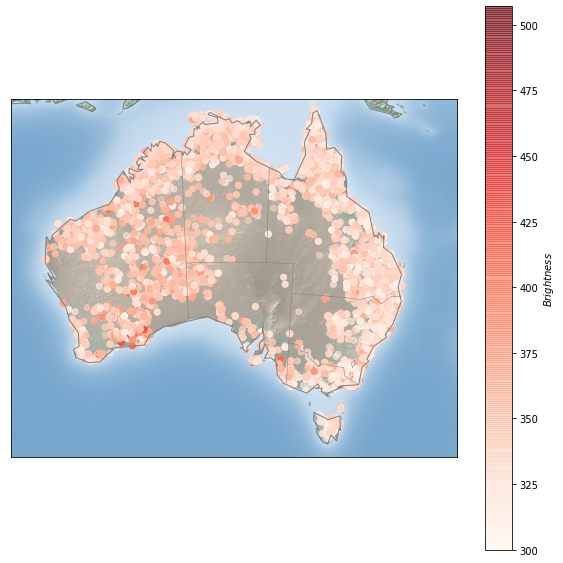

In [17]:
lat = df1['latitude'].values
lon = df1['longitude'].values
brg = df1['brightness'].values

fig = plt.figure(figsize = (10, 10))
m = Basemap(projection = 'lcc', resolution='c', lat_0 =-27.6, lon_0 = 134.35,width=5E6, height=4E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.scatter(lon, lat, c= brg,latlon=True,cmap='Reds', alpha=0.6)
plt.colorbar(label=r'$Brightness$')

In [0]:
df1_night=df1.loc[df1['daynight'].isin(['N'])]
df1_day=df1.loc[df1['daynight'].isin(['D'])]

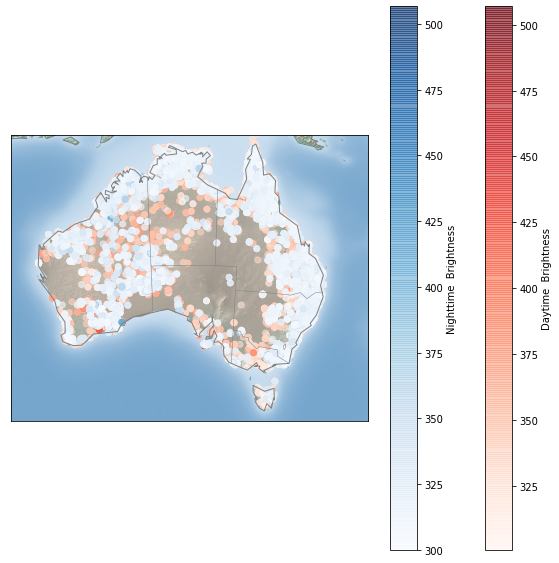

In [19]:
lat_d = df1_day['latitude'].values
lon_d = df1_day['longitude'].values
brg_d = df1_day['brightness'].values

lat_n = df1_night['latitude'].values
lon_n = df1_night['longitude'].values
brg_n = df1_night['brightness'].values

fig = plt.figure(figsize = (10, 10))
m = Basemap(projection = 'lcc', resolution='c', lat_0 =-27.6, lon_0 = 134.35,width=5E6, height=4E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.scatter(lon_d, lat_d, c= brg_d, latlon=True,cmap='Reds', alpha=0.6)
plt.colorbar(label='Daytime  Brightness')

m.scatter(lon_n, lat_n, c= np.array(brg_n),latlon=True,cmap='Blues', alpha=0.6)
plt.colorbar(label='Nighttime  Brightness')

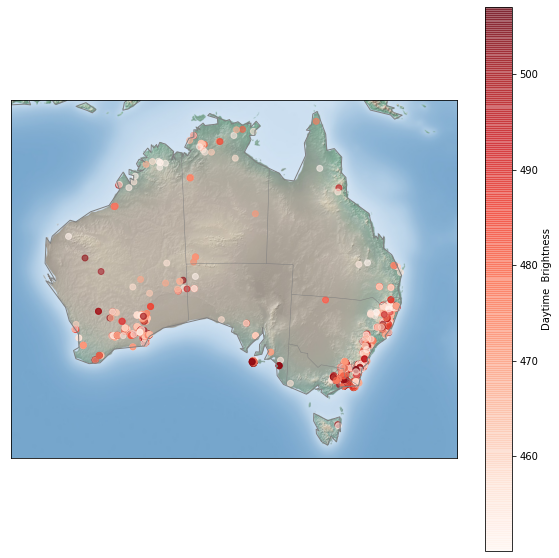

In [21]:
df1_hot=df1[df1['brightness']>450]
lat_hot=df1_hot['latitude'].values
lon_hot=df1_hot['longitude'].values
brg_hot=c=df1_hot['brightness'].values


fig = plt.figure(figsize = (10, 10))
m = Basemap(projection = 'lcc', resolution='c', lat_0 =-27.6, lon_0 = 134.35,width=5E6, height=4E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.scatter(lon_hot,lat_hot,c=brg_hot, latlon=True,cmap='Reds', alpha=0.6)
plt.colorbar(label='Daytime  Brightness')